<a href="https://colab.research.google.com/github/sshivaditya2019/CompAutoEnco/blob/main/SimpleAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torchvision
import torch.nn as nn
import torch.optim
import matplotlib.pyplot as plt
import numpy as np

In [27]:
class AutoEnc(nn.Module):
  def __init__(self, **kwargs):
    super().__init__()
    self.encoder_hidden_layer  = nn.Linear(
        in_features = kwargs["input_shape"],
        out_features = 128
    )
    self.encoder_output_layer = nn.Linear(
        in_features = 128,
        out_features = 128
    )
    self.decoder_hidden_layer = nn.Linear(
        in_features = 128,
        out_features = 128
    )
    self.decoder_output_layer = nn.Linear(
        in_features = 128,
        out_features = kwargs["input_shape"]
    )
  
  def forward(self, features):
    activation = self.encoder_hidden_layer(features)
    activation = torch.relu(activation)
    code = self.encoder_output_layer(activation)
    code = torch.relu(code)
    activation = self.decoder_hidden_layer(code)
    activation = torch.relu(activation)
    activation = self.decoder_output_layer(activation)
    reconstructed = torch.relu(activation)
    return reconstructed

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoEnc(input_shape = 784).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

criterion = nn.MSELoss()

In [29]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,batch_size = 128, shuffle = True, num_workers = 4, pin_memory = True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [30]:
epochs = 10

In [33]:
for epoch in range(epochs):
  loss = 0
  for batch_features,_ in train_loader:
    batch_features = batch_features.view(-1,784).to(device)
    optimizer.zero_grad()
    outputs = model(batch_features)
    train_loss =  criterion(outputs, batch_features)
    train_loss.backward()
    optimizer.step()
    loss += train_loss.item()

  loss = loss/len(train_loader)
  print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))


epoch : 1/10, loss = 0.030480
epoch : 2/10, loss = 0.016449
epoch : 3/10, loss = 0.014677
epoch : 4/10, loss = 0.013711
epoch : 5/10, loss = 0.013070
epoch : 6/10, loss = 0.012603
epoch : 7/10, loss = 0.012211
epoch : 8/10, loss = 0.011944
epoch : 9/10, loss = 0.011718
epoch : 10/10, loss = 0.011553


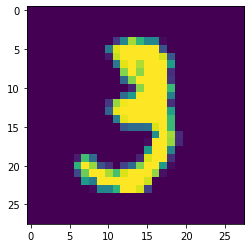

In [64]:
plt.imshow(np.array(train_dataset[10][0][0]))

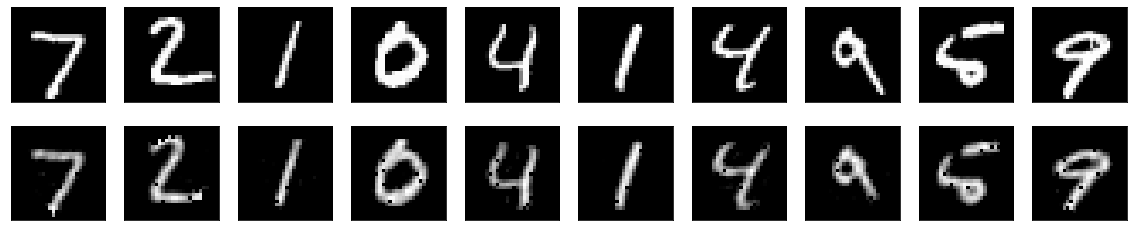

In [69]:
test_examples = None
with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        test_examples = batch_features.view(-1, 784)
        reconstruction = model(test_examples)
        break
with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()